In [2]:
import numpy as np
import pandas as pd
import pickle as pkl
from sklearn import metrics
import matplotlib.pylab as plt
%matplotlib inline

In [4]:
path = "../../../Google Drive/Data_science/NYU/Machine Learning/ML Project (Collisions)/data_for_training/v4/normalized_1hot" #Joe
#path = "../../../../Google Drive/ML Project (Collisions)/" # Joyce
# path = "" # Lucas

In [5]:
val_X = pkl.load(open(path+'/val_X.pkl','rb'))
val_y = pkl.load(open(path+'/val_y.pkl','rb'))

In [6]:
rf = pkl.load(open(path+'/../../../ROC curve/RF.pkl', 'rb'))
xg = pkl.load(open('./best_xgboost_all_data.pkl','rb')).predict_proba(val_X)[:,1]

In [10]:
nn = np.load(path+'/../../../ROC curve/predict_proba_densetnet (1).npy')
lr = pkl.load(open(path+'/../../../ROC curve/logreg.pkl', 'rb'))

In [4]:
best_model = pkl.load(open('./best_xgboost_all_data.pkl','rb'))
rf_model = pkl.load(open(path+'/../../../models/all_None.pkl','rb'))
lr_model = pkl.load(open(path+'/../../../models/model_logreg.pkl','rb'))

In [17]:
test_X = pkl.load(open(path+'/test_X.pkl','rb'))
test_y = pkl.load(open(path+'/test_y.pkl','rb'))

In [29]:
test_preds = lr_model.predict_proba(test_X)

In [30]:
metrics.roc_auc_score(test_y, test_preds[:,1])

0.66704199119228058

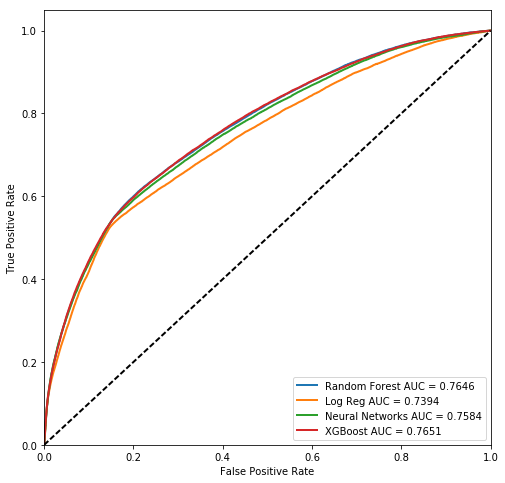

In [14]:
val_preds = {'XGBoost': xg, 'Random Forest': rf, 'Neural Networks': nn, 'Log Reg': lr}

plt.figure(figsize=(8,8))
lw = 2
for key in val_preds.keys():
    fpr, tpr, _ = metrics.roc_curve(val_y, val_preds[key])
    plt.plot(fpr, tpr,
         lw=lw, label=key+' AUC = %0.4f' % metrics.auc(fpr,tpr))

plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [3]:
target_variable = 'injured_or_killed'
column_names = [i for i in pkl.load(open('../../../Google Drive/Data_science/NYU/Machine Learning/ML Project (Collisions)/data_for_training/v4/'+'collisions_1hot.pkl', 'rb')).columns.values if i != target_variable]

In [5]:
foo = pd.Series(best_model.feature_importances_, index=column_names)

In [10]:
foo.sort_values(ascending=False)[:20].bar()

AttributeError: 'Series' object has no attribute 'bar'

In [17]:
model_path = '../../../Google Drive/Data_science/NYU/Machine Learning/ML Project (Collisions)/Models/'

In [20]:
bike_model = pkl.load(open(model_path + 'best_xgboost_bike_data.pkl','rb'))
one_model = pkl.load(open(model_path + 'best_xgboost_one_data.pkl','rb'))
multi_model = pkl.load(open(model_path + 'best_xgboost_multi_data.pkl','rb'))
best_model = pkl.load(open(model_path + 'best_xgboost_all_data.pkl','rb'))

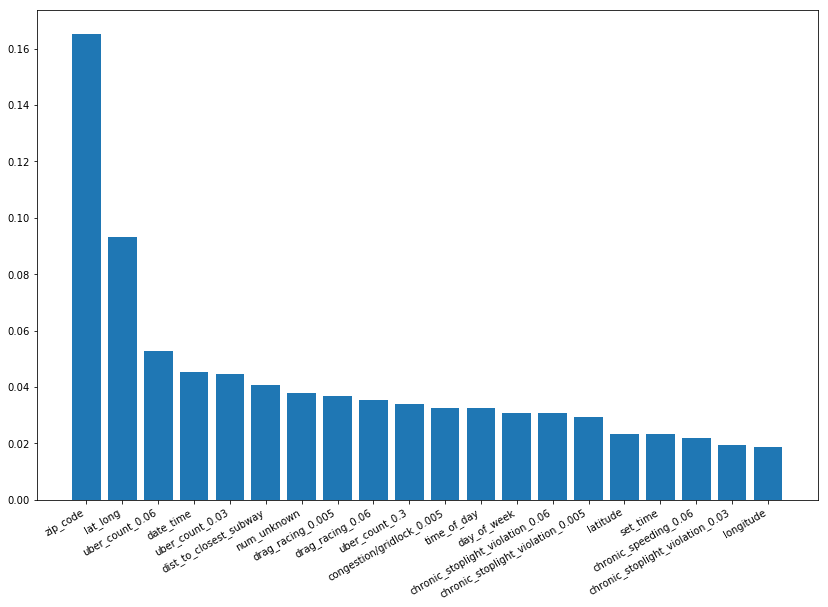

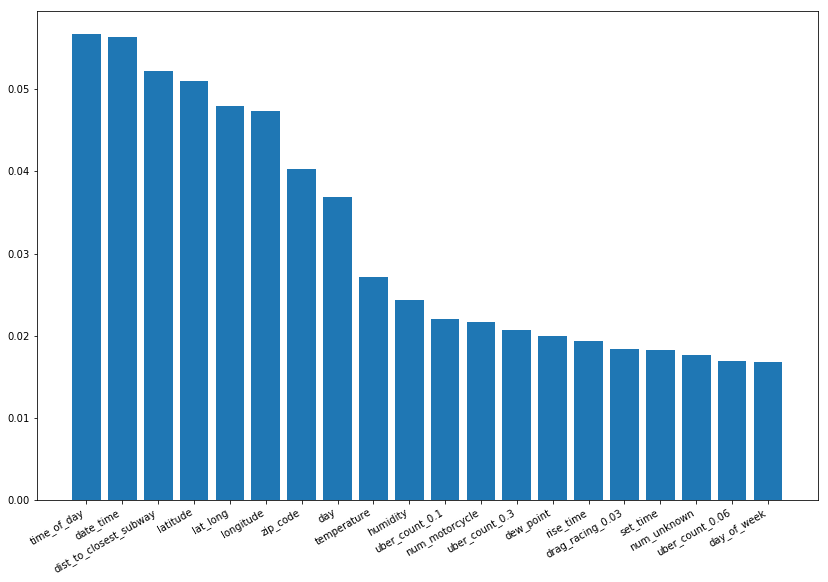

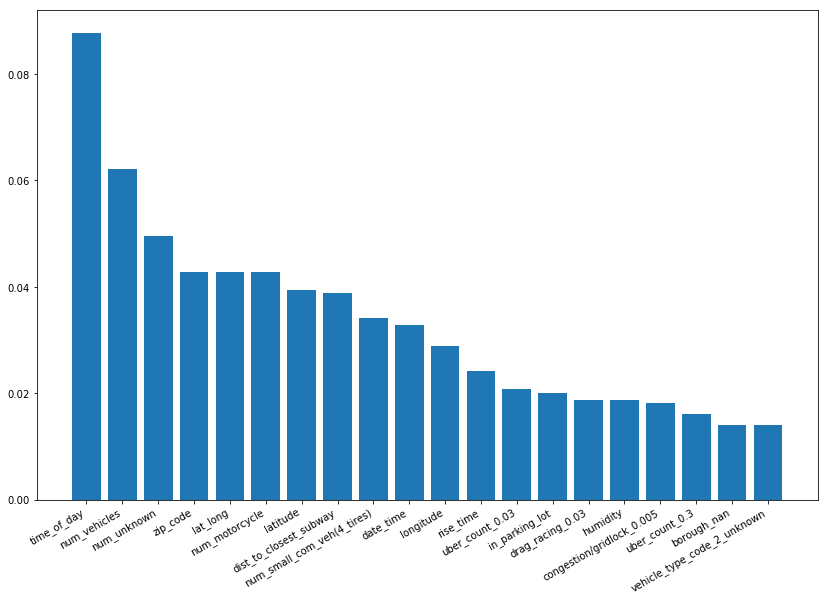

In [21]:
for model in [bike_model, one_model, multi_model]:
    fig = plt.figure(figsize=(14, 10))
    num_features = 20
    y_pos = np.arange(num_features)

    importances = pd.Series(model.feature_importances_, index=column_names)
    topX = importances.sort_values(ascending = False)[:num_features]
    plt.bar(y_pos, topX)
    plt.xticks(y_pos, topX.index)
    fig.autofmt_xdate()

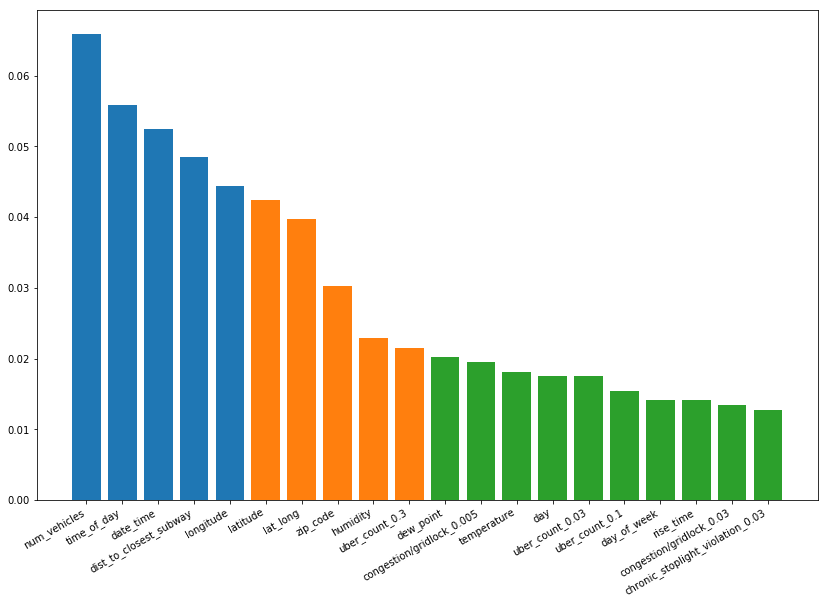

In [15]:
fig = plt.figure(figsize=(14, 10))
num_features = 20
y_pos = np.arange(num_features)

importances = pd.Series(best_model.feature_importances_, index=column_names)
topX = importances.sort_values(ascending = False)[:num_features]
topXa = topX*[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
topXb = topX*[0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]
topXc = topX*[0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
plt.bar(y_pos, topXa)
plt.bar(y_pos, topXb)
plt.bar(y_pos, topXc)
plt.xticks(y_pos, topX.index)
fig.autofmt_xdate()